In [1]:
import nxsdk.api.n2a as nx
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
from gridAgent import *

In [3]:
grid_x = 5
grid_y = 5
dimensions = 2

n_states = grid_x * grid_y
n_actions = 4
n_estimates = n_states * n_actions

In [4]:
n_estimates

100

In [5]:
t_epoch = 50
n_epochs = 1000

In [6]:
agent = GridAgent(n_epochs=n_epochs, debug=False)

In [7]:
agent.hippocampus.blocks

{'feedback_delay': <primitives.OrNode at 0x7fadfcad5240>,
 'feedback_sum': <primitives.OrNode at 0x7fadfca328d0>,
 'filter': <primitives.AndNode at 0x7fadfcba9e48>,
 'punishment_buffer': <primitives.OrNode at 0x7fadfca32320>,
 'punishment_gate': <primitives.AndNode at 0x7fadfcad5e48>,
 'reward_buffer': <primitives.OrNode at 0x7fadfca32828>,
 'reward_gate': <primitives.AndNode at 0x7fadfcad5828>,
 'state_memory': <primitives.FlipFlopNode at 0x7fadfcb35630>}

In [8]:
#dec_spks = agent.decoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [9]:
#enc_spks = agent.encoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [10]:
#hc_spks = agent.hippocampus.blocks['state_memory'].get_outputs().probe(nx.ProbeParameter.SPIKE)

In [11]:
#ctx_spks = agent.cortex.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [12]:
agent.transitions

array([[[1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0]]])

In [13]:
agent.transitions[0,:,4]

array([0, 0, 0, 0, 0])

In [14]:
agent.transitions[1,4,:]

array([0, 0, 0, 0, 0])

In [15]:
net = agent.network

In [17]:
results = []
runs = 1
for i in range(runs):
    results.append(agent.run())

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.108:42669
INFO:DRV:      Host server up..............Done 0.21s
INFO:DRV:      Encoding axons/synapses.....Done 0.22s
INFO:DRV:      Compiling Embedded snips....Done 0.34s
INFO:HST:  Args chip=0 cpu=0 /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592440073.2994242/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 2.12s
INFO:DRV:      Encoding probes.............Done 0.96ms
INFO:DRV:      Transferring probes.........Done 3.90ms
INFO:DRV:      Configuring registers.......Done 0.13s
INFO:DRV:      Transferring spikes.........Done 0.86ms
INFO:HST:  chip=0 cpu=0 Setting up...
INFO:HST:  chip=0 cpu=0 Got variables
INFO:HST:  chip=0 cpu=0 Got R/P/State/Condition compartments
INFO:HST:  chip=0 cpu=0 Got Counter compartments
INFO:HST:  chip=0 cpu=0 Got estimate locs & values, done.
I

In [18]:
agent.board.disconnect()

INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [19]:
results[-1]

(array([[1, 2, 0],
        [1, 3, 3],
        [0, 3, 3],
        ...,
        [1, 0, 3],
        [0, 0, 0],
        [0, 1, 0]]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,
         0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,
         0,  1,  0,  0,  0,  0,  1,

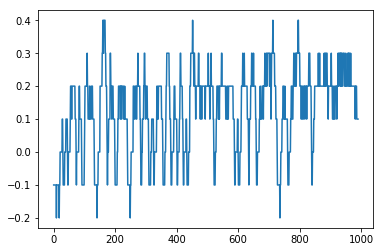

In [20]:
plt.plot(np.convolve(results[-1][1], np.ones(10),mode='valid')/10)

In [21]:
results[-1][0].shape

(1000, 3)

In [22]:
data = results[-1][0]

In [23]:
np.unique(data[:,0])

array([0, 1, 2, 3, 4])

In [24]:
np.unique(data[:,1])

array([0, 1, 2, 3, 4])

In [25]:
np.unique(data[:,2])

array([0, 1, 2, 3])

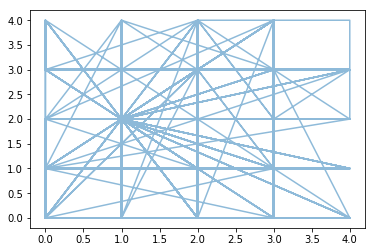

In [26]:
plt.plot(results[-1][0][:,0], results[-1][0][:,1], alpha=0.50)

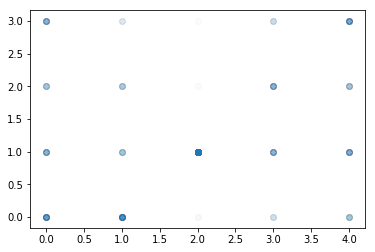

In [27]:
plt.scatter(results[-1][0][:,1], results[-1][0][:,2], alpha=0.01)

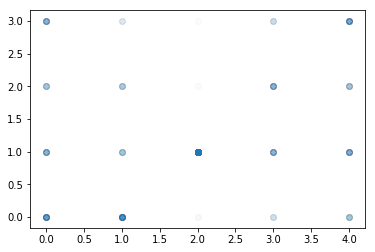

In [28]:
plt.scatter(results[-1][0][:,1], results[-1][0][:,2], alpha=0.01)

In [29]:
agent.final_estimates

array([[[2048],
        [   0],
        [-128],
        [-256],
        [   0],
        [3712],
        [   0],
        [   0],
        [-128],
        [   0],
        [   0],
        [   0],
        [   0],
        [-128],
        [ 128],
        [-128],
        [   0],
        [ 256],
        [-256],
        [-256],
        [   0],
        [ 128],
        [-256],
        [ 128],
        [   0]],

       [[-128],
        [   0],
        [-256],
        [ 640],
        [1152],
        [   0],
        [   0],
        [ 128],
        [ 896],
        [1280],
        [4480],
        [5248],
        [ 256],
        [1152],
        [1152],
        [1408],
        [   0],
        [-256],
        [ 128],
        [ 256],
        [ 128],
        [   0],
        [-384],
        [   0],
        [-128]],

       [[   0],
        [-128],
        [-128],
        [-256],
        [   0],
        [   0],
        [ 768],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
    

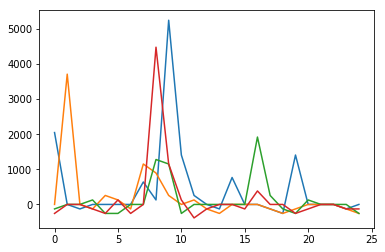

In [30]:
plt.plot(agent.final_estimates.reshape(25,4))